In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

Loading data

In [24]:
data = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

Dropping unnecessary columns and renaming

In [25]:
data = data.drop(columns=data.columns[2:5])
data.columns = ['Category', 'Message']

Converting the labels to binary

In [26]:
data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

Text preprocessing and TF-IDF

In [27]:
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['Message'])
y = data['Category']

Training and evaluating the models using Naive Bayes, Logistic regression and SVM

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

Predicting accuracies of each algorithm and plotting confusion matrix of predicted values against true values for each algorithm

Naive Bayes Accuracy: 0.968609865470852
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



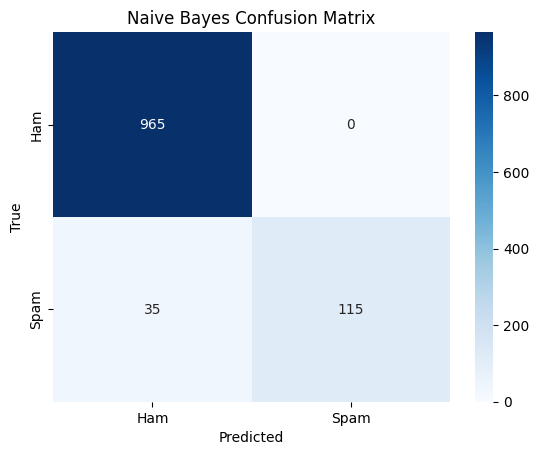

Logistic Regression Accuracy: 0.9443946188340807
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



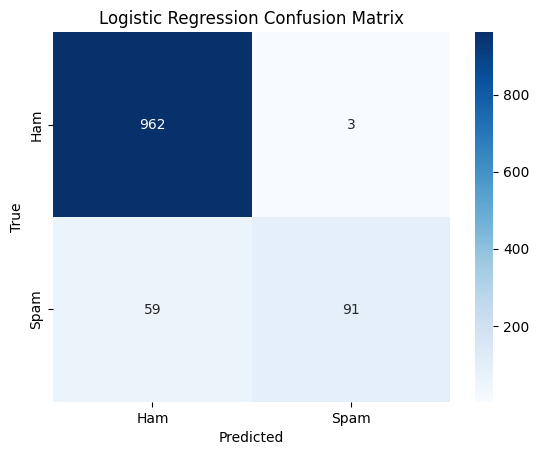

SVM Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



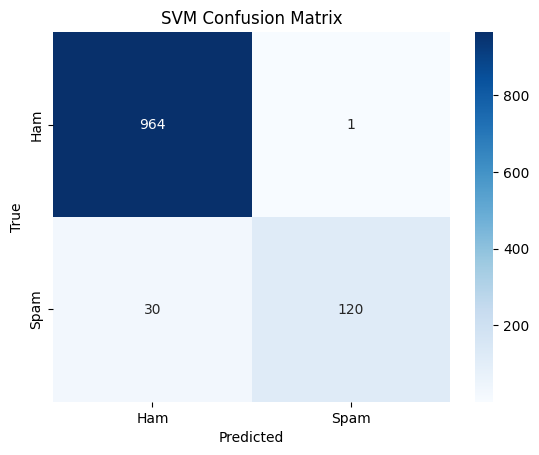

In [29]:
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


Plotting the accuracies of each model using matplotlib library

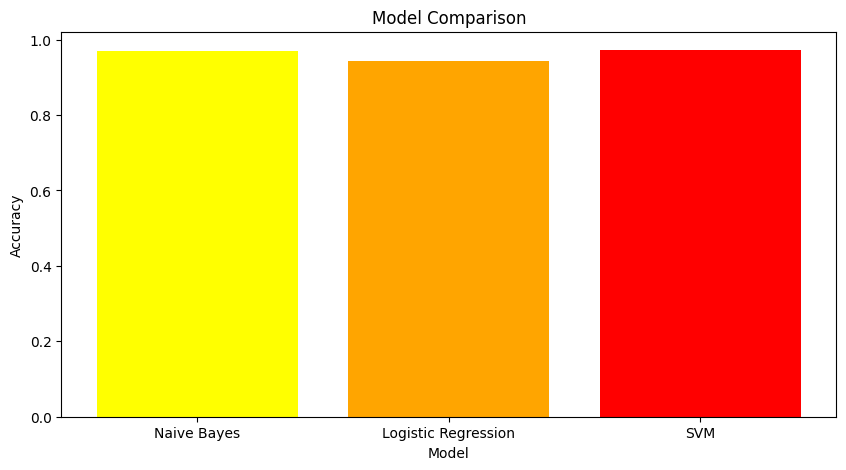

In [30]:
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['yellow', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

Saving the best model after comparing the accuracy score of each model

In [31]:
joblib.dump(accuracy_score, 'best_model_balanced.pkl')
print("Model saved successfully")

Model saved successfully
